<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [14]:
import pandas as pd
import psycopg2
from configparser import ConfigParser
import plotly.express as px

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

In [42]:
'''Скрываем логин и пароль от БД до выгрузки в git
Создаем переменную config и urlsconf, в которой будет храниться путь до файла .ini
'''
urlsconf='config/config.ini'
config=ConfigParser()
config.read(urlsconf)

['config/config.ini']

In [43]:
DBNAME=config['login_db']['DBNAME']
USER=config['login_db']['USER']
PASSWORD=config['login_db']['PASSWORD']
HOST=config['tg_bot']['HOST']
PORT=config['tg_bot']['PORT'] 

In [44]:
# параметры подключения
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [6]:
# текст запроса
query_3_1 = f''' 
select count(id)
from vacancies
'''

In [7]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


In [41]:
# закрываем соединение после окончания работы
connection.close()

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [39]:
query_3_2 = f''' 
select count(id)
from public.employers
'''

In [45]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6960\3062646138.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


In [ ]:
# закрываем соединение после окончания работы
connection.close()

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [10]:
# текст запроса
query_3_3 = f''' 
select count(id)
from public.areas
'''

In [11]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\928149064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


In [ ]:
# закрываем соединение после окончания работы
connection.close()

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [12]:
# текст запроса
query_3_4 = f''' 
select count(id)
from public.industries
'''

In [13]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\2101691108.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


In [ ]:
# закрываем соединение после окончания работы
connection.close()

***

In [14]:
# выводы по предварительному анализу данных

*У нас есть данные о 49197 опубликованных вакансиях на сайте hh.ru. Данные содержат  информацию о 23501 работадателях. Всего на сайте представлено 294 сферы деятельности работодателей.*

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [8]:
# текст запроса
# объединяем таблицы vacancies и areas по ключу - id и area_id
# выводим количество вакансий, группируя по регионам
query_4_1 = f''' 
select 
    a.name city, 
    count(v.id) cnt
from vacancies v
join areas a on a.id=v.area_id
group by a.id
order by 2 desc
limit 5
'''

In [9]:
# результат запроса
df_cities = pd.read_sql_query(query_4_1, connection)
df_cities

C:\Users\Marsel\AppData\Local\Temp\ipykernel_8752\2918578380.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cities = pd.read_sql_query(query_4_1, connection)


,city,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


In [ ]:
# закрываем соединение после окончания работы
connection.close()

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [17]:
# текст запроса
# выбираем вакансии с ненулевыми значениями заработной платы salary_from и salary_to
query_4_2 = f''' 
select 
    count(v.id) cnt
from vacancies v
where salary_from is not null
    or salary_to is not null
'''

In [18]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\970655580.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


In [ ]:
# закрываем соединение после окончания работы
connection.close()

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [19]:
# текст запроса
# считаем верхнюю и нижнюю границы средней заработной платы из таблицы вакансии
query_4_3 = f''' 
select 
    round(AVG(salary_from)) "нижняя граница",
    round(AVG(salary_to)) "верхняя граница"
from vacancies v

'''

In [20]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\2500607024.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,нижняя граница,верхняя граница
0,71065.0,110537.0


In [ ]:
# закрываем соединение после окончания работы
connection.close()

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [21]:
# текст запроса
# выводим количество вакансии в зависимости от типа графика и типа трудоустройства
query_4_4 = f''' 
select 
    schedule,
    employment,
    count(id) cnt
from vacancies v
group by schedule, employment
order by cnt desc
'''

In [22]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\2022935265.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,schedule,employment,cnt
0,Удаленная работа,Полная занятость,7802


In [ ]:
# закрываем соединение после окончания работы
connection.close()

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [34]:
# текст запроса
# выводим количество вакансии в зависимости от требуемого опыта работы (experience)
query_4_5 = f''' 
select 
    experience,
    count(id) cnt
from vacancies v
group by experience
order by cnt
'''

In [39]:
# результат запроса
df_experience = pd.read_sql_query(query_4_5, connection)
df_experience

C:\Users\Marsel\AppData\Local\Temp\ipykernel_8752\1343279108.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

In [ ]:
# закрываем соединение после окончания работы
connection.close()

In [ ]:
# выводы по детальному анализу вакансий

1. *В пятерку лидеров городов по количеству вакансии входят: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы - это самые крупные города России, Белоруссии и Казахстана. Наибольшее количество вакансий в Москве (см. диаграмму 1)*
2. *Данные о зарплате указаны в 24073 вакансиях, т.е. 48% от общего количества вакансий-49197.*
3. *Средняя вилка заработной платы: минимальная граница- 71065, максимальная граница -110537.*
4. *Самый востребованный формат трудоустройства - полная занятость, среди графика работы - полный день и удаленная работа.*
5. *На рынке больше всего предложений о работе для кандидатов с опытом работы от 1 до 3 лет - первый по популярности, от 3 до 6 лет- второй. Могу предположить, что связано это, с тем что специалистов с опытом более 6 лет занимают более ответственные должности, и их в первую очередь стараются найти через занкомых или приглашают из других компаний.*  

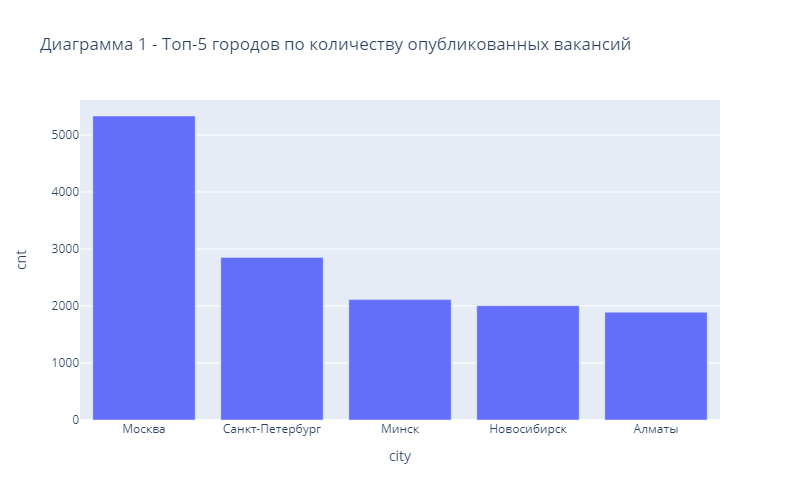

In [75]:
# построим столбчатую диаграмму распределения количества вакансий среди пяти самых популярных городов
# по количеству опубликованных вакансий
fig = px.bar(
    data_frame=df_cities,
    x='city',
    y='cnt',
    title='Диаграмма 1 - Топ-5 городов по количеству опубликованных вакансий',
    width=800,
    height=500,
    
)
fig.show('png')

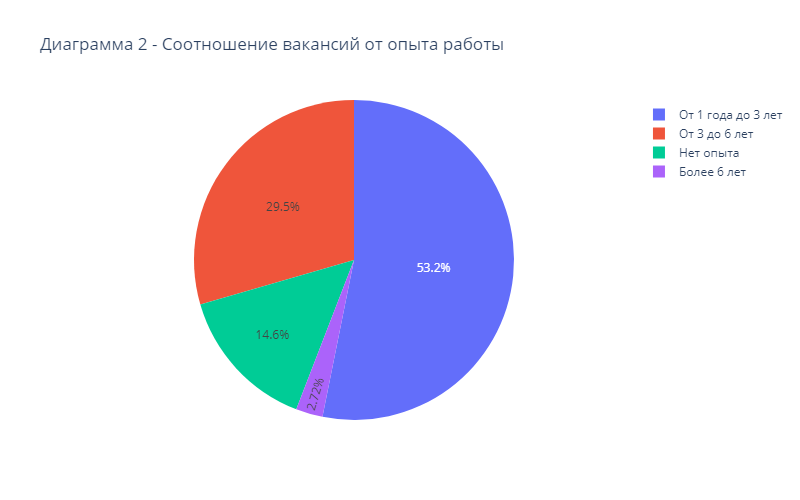

In [41]:
# построим круговую диаграмму распределения количества вакансий среди относительно требуемого опыта работы
fig = px.pie(
    data_frame=df_experience,
    values=df_experience['cnt'],
    names=df_experience['experience'],
    title='Диаграмма 2 - Соотношение вакансий от опыта работы',
    width=800,
    height=500,
    
)
fig.show('png')


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [26]:
# текст запроса
# объединяем таблицы vacancies и employers по ключу - id и employer_id
# выводим 1-ое и 5-ое место по количеству вакансий, соединяя через union all

query_5_1 = f''' 
(select 
    e.name employer_name,
    count(v.id) cnt
from vacancies v
join employers e on e.id=v.employer_id
group by e.id
order by cnt desc
limit 1)
union all
(select 
    e.name employer_name,
    count(v.id) cnt
from vacancies v
join employers e on e.id=v.employer_id
group by e.id
order by cnt desc
offset 4 limit 1)
'''

In [27]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\3834399874.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


,employer_name,cnt
0,Яндекс,1933
1,Газпром нефть,331


In [ ]:
# закрываем соединение после окончания работы
connection.close()

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [46]:
# текст запроса
# объединяем таблицу area  через леое соединение с таблицами vacancies и employers
# оставляем строки с нулевым значением id в таблице vacancies
query_5_2 = f''' 
select 
    a.name area,
    count(v.id) cnt_vacancies,
    count(distinct e.id) cnt_employers
from areas a
left join vacancies v on v.area_id=a.id
left join employers e on e.area=a.id
where v.id is null
group by a.id
order by cnt_employers desc
limit 1
'''

In [47]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_8752\2250345976.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,cnt_vacancies,cnt_employers
0,Россия,0,410


In [ ]:
# закрываем соединение после окончания работы
connection.close()

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [30]:
# текст запроса
# для подсчета количества вакансий по регионам от работодателя, объединяем таблицу vacancies с employers, areas
query_5_3 = f''' 
select 
    e.name employer_name,
    count(distinct a.id) cnt_areas
from vacancies v
join employers e on v.employer_id=e.id
join areas a on v.area_id=a.id
group by e.id
order by cnt_areas desc
'''

In [31]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\201667002.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,employer_name,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


In [ ]:
# закрываем соединение после окончания работы
connection.close()

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [32]:
# текст запроса
# для вывода количества работодателей без сфер деятельности,
# используем левое объединение таблицы  employers c employers_industries,
# с нулеыми значениями  industry_id из employers_industries

query_5_4 = f''' 
select 
   count(e.id)
from employers e
left join employers_industries ee on ee.employer_id=e.id
where ee.industry_id is null
'''

In [33]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\3493105328.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,count
0,8419


In [ ]:
# закрываем соединение после окончания работы
connection.close()

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [18]:
# текст запроса
# используем объединение таблиц с задания 5.4, добаим фильтр на количество сфер деятельности = 4
query_5_5 = f''' 
select 
   e.name employers_name
from employers e
left join employers_industries ee on ee.employer_id=e.id
group by e.id
having count(ee.industry_id)=4
order by 1
offset 2 limit 1
'''

In [35]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\388711819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,employers_name
0,2ГИС


In [ ]:
# закрываем соединение после окончания работы
connection.close()

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [36]:
# текст запроса
# выводим количесто работодателей, занимающихся разработкой программного обеспечения
query_5_6 = f''' 
select 
   count(ee.employer_id) cnt
from employers_industries ee
join industries i on ee.industry_id=i.id
where i.name='Разработка программного обеспечения'
group by i.id
'''

In [37]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\821628714.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,cnt
0,3553


In [ ]:
# закрываем соединение после окончания работы
connection.close()

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [7]:
# код для получения списка городов-милионников со страницы wikipedia
tables=pd.read_html('https://ru.wikipedia.org/w/index.php?title=%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8&veaction=edit&section=2')
table_cities=tables[1].replace({'Город':{'Воронеж[a]':'Воронеж'}})
cities=tuple(table_cities['Город'].tolist())
cities

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [31]:
# текст запроса
# используя таблицу cities получаем список количества вакансий в городах-милионниках России от комания Яндекс
# добавляем строку с общим итогом
query_5_7 = f''' 
with cte as(
   select 
   a.name,
   count(v.id) cnt
from vacancies v
join employers e on v.employer_id=e.id
join areas a on a.id=v.area_id
where e.name='Яндекс' and a.name in {cities}
group by a.id)
select
   'Total' as name,
   sum(cnt) 
from cte as c
union all 
select 
   c.name,
   c.cnt 
from cte as c
order by 2
'''

In [32]:
# результат запроса
df_ya = pd.read_sql_query(query_5_7, connection)
df_ya

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6960\516799912.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ya = pd.read_sql_query(query_5_7, connection)


,name,sum
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


***

In [ ]:
# закрываем соединение после окончания работы
connection.close()

In [41]:
# выводы по анализу работодателей

*Наибольшее количество вакансий предоставлены компанией Яндекс. Они опубликованы в 181 регионе - это максимальный покатезатель среди работодателей. Наибольшее количество вакансий от Яндекс опубликовано в Москве. Распределение количества вакансий по городам-милионникам можно посмотреть на диаграмме 3.*

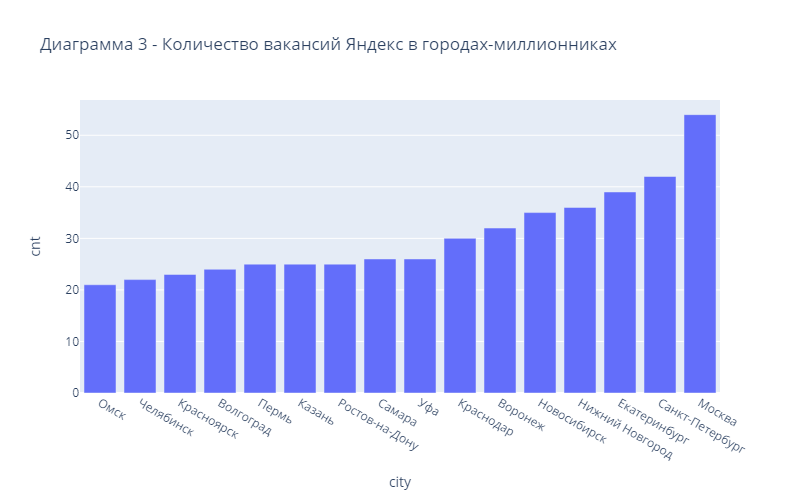

In [61]:
# построим столбчатую диаграмму распределения количества вакансий Яндекс в городах-милионниках
fig = px.bar(
    data_frame=df_ya[0:16],
    x='city',
    y='cnt',
    title='Диаграмма 3 - Количество вакансий Яндекс в городах-милионниках',
    width=800,
    height=500,
    
)
fig.show('png')

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [42]:
# текст запроса
# выводим количество вакансий, имеющих в наименовании слова data или данн
query_6_1 = f''' 
select 
   count(id) cnt
from vacancies
where name ilike '%data%' or
    name ilike'%данн%'
'''

In [43]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\366702258.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,cnt
0,1771


In [ ]:
# закрываем соединение после окончания работы
connection.close()

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [47]:
# текст запроса
# подсчитаем коичество вакансий для начинающего дата-сайентиста, для этого напишем запрос, 
# который отбирает строки только с определенными словами, без опыта работы  или с указанием junior в наименовании
query_6_2 = f''' 
select 
   count(id) cnt
from vacancies
where (name ilike '%data scientist%' or
    name ilike'%data science%' 
    or name ilike'%исследователь данных%'
    or (name like'%ML%' and name not like '%HTML%')
    or name ilike'%machine learning%'
    or name ilike'%машинн%обучен%'
	)	
    and (name ilike'%junior%'
    or experience = 'Нет опыта'
    or employment ='Стажировка')
'''

In [48]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_6596\2267038862.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,cnt
0,51


In [ ]:
# закрываем соединение после окончания работы
connection.close()

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
# находим количество вакансий с ключевым навыком - знание SQL среди дата-сайентистов
query_6_3 = f''' 
select 
   count(id) cnt
from vacancies
where (name ilike '%data scientist%' or
    name ilike'%data science%' 
    or name ilike'%исследователь данных%'
    or (name like'%ML%' and name not like '%HTML%')
    or name ilike'%machine learning%'
    or name ilike'%машинн%обучен%'
    )
    and (key_skills ilike '%SQL%' or key_skills ilike '%postgres%')
'''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_14068\3794299702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,cnt
0,201


In [ ]:
# закрываем соединение после окончания работы
connection.close()

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса
# находим количество вакансий с ключевым навыком - знание Python среди дата-сайентистов
query_6_4 = f''' 
select 
   count(id) cnt
from vacancies
where (name ilike '%data scientist%' or
    name ilike'%data science%' 
    or name ilike'%исследователь данных%'
    or (name like'%ML%' and name not like '%HTML%')
    or name ilike'%machine learning%'
    or name ilike'%машинн%обучен%'
    )
    and (key_skills ilike '%python%')
'''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_14068\4264665179.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,cnt
0,351


In [ ]:
# закрываем соединение после окончания работы
connection.close()

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# текст запроса
# вычислим среднее значение количества требуемых ключевых навыков в вакансиях дата-сайентиста
query_6_5 = f''' 
select
   round(avg(length(key_skills) - length(replace(key_skills, CHR(9), ''))+1),2)
from vacancies
where (name ilike '%data scientist%' or
    name ilike'%data science%' 
    or name ilike'%исследователь данных%'
    or (name like'%ML%' and name not like '%HTML%')
    or name ilike'%machine learning%'
    or name ilike'%машинн%обучен%'
    )
and key_skills is not null 
'''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_14068\3654210517.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,round
0,6.41


In [ ]:
# закрываем соединение после окончания работы
connection.close()

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [70]:
# текст запроса
# найдем уровень средней заработной платы в вакансиях для дата-сайентиста,
# исключив строки с пустыми значениями salary_from ,salary_to 
query_6_6 = f''' 
select 
    experience,
    round(avg(coalesce((salary_to+salary_from)/2,salary_from,salary_to)),0)
from vacancies
where (name ilike '%data scientist%' or
    name ilike '%data science%' 
    or name ilike '%исследователь данных%'
    or (name like '%ML%' and name not like '%HTML%')
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%')
    and (salary_to is not null or salary_from is not null)
group by experience 
'''

In [71]:
# результат запроса
df_salary= pd.read_sql_query(query_6_6, connection)
df_salary

C:\Users\Marsel\AppData\Local\Temp\ipykernel_8752\1489376021.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

In [ ]:
# закрываем соединение после окончания работы
connection.close()

In [ ]:
# выводы по предметному анализу

*Всего на сайте hh.ru опубликовано 1771 интересующих нас вакансий, имеющих отношение к работе с данными. Из них 51 - работодатели рассматривают джуниоров или без опыта работы. Указание в ключевых навыках Python  и SQL присутствует в 201 и 351 вакансии соответственно, но думаю, что таких вакансий должно быть больше, так как данное требование скорее всего обязательное, и указано в других вакансиях в описании. В среднем работодатель указывает 6 требуемых скиллов.*
*Средняя заработная плата дата-сайнетиста в зависимости от опыта работы приведена на круговой диаграмме 4.*

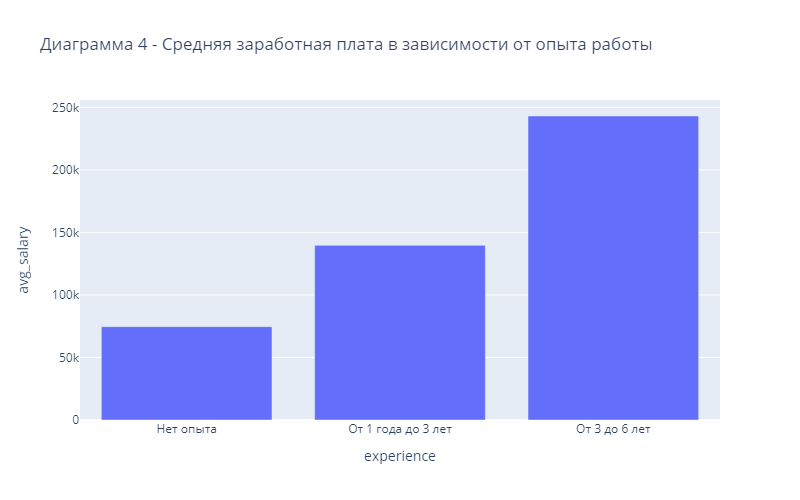

In [76]:
# построим столбчатую диаграмму распределения средней заработной платы в зависимости от опыта работы

fig = px.bar(
    data_frame=df_salary,
    x='experience',
    y='avg_salary',
    title='Диаграмма 4 - Средняя заработная плата в зависимости от опыта работы',
    width=800,
    height=500,
    
)
fig.show('png')

# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

1. Наибольшее количество вакансий размещено от компания Яндекс, с самой обширной георграфией, включающей себя 181 регион. 
2. Москва - регион с максимальным количеством вакансий.
3. Всего на сайте опубликовано 49197 вакансий,  из которых 1771, связаны с данными.
4. Проведем дополнительные исседования, чтобы узнать в каких городах вакансия дата-сайентиста больше востребованна, а также отличается ли средняя заработная плата среди этих городов.

In [91]:
# выводим города, входящие в топ-3 по количеству опубликованных вакансий для дата-сайентиста

query_7_1 = f''' 
select 
    a.name area, 
    count(v.id) cnt
from vacancies v
join areas a on v.area_id=a.id
where (v.name ilike '%data scientist%' or
    v.name ilike '%data science%' 
    or v.name ilike '%исследователь данных%'
    or (v.name like '%ML%' and v.name not like '%HTML%')
    or v.name ilike '%machine learning%'
    or v.name ilike '%машинн%обучен%')
    
group by a.id
order by cnt desc
limit 3
'''

In [92]:
# результат запроса
df= pd.read_sql_query(query_7_1, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_8752\1654292630.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,cnt
0,Москва,217
1,Санкт-Петербург,64
2,Новосибирск,23


In [ ]:
# закрываем соединение после окончания работы
connection.close()

In [99]:
# сравним среднюю заработную плату, указанную в вакансиях. 
# для этого будем использовать аналогичный подход, используемый в задании 6.6 :
# если указана вилка заработной платы, будем использовать среднее значение,
# если указан только вариант salary_from или salary_to, считаем его.
query_7_1 = f''' 
select 
    a.name area, 
    round(avg(coalesce((v.salary_to+v.salary_from)/2,v.salary_from,v.salary_to)),0) avg_salary
from vacancies v
join areas a on v.area_id=a.id
where (v.name ilike '%data scientist%' or
    v.name ilike '%data science%' 
    or v.name ilike '%исследователь данных%'
    or (v.name like '%ML%' and v.name not like '%HTML%')
    or v.name ilike '%machine learning%'
    or v.name ilike '%машинн%обучен%')
    and (salary_to is not null or salary_from is not null)
    and a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск')
group by a.id
order by avg_salary desc
'''

In [102]:
# результат запроса
df= pd.read_sql_query(query_7_1, connection)
df

C:\Users\Marsel\AppData\Local\Temp\ipykernel_8752\1654292630.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,avg_salary
0,Москва,207630.0
1,Санкт-Петербург,173335.0
2,Новосибирск,166333.0


In [ ]:
# закрываем соединение после окончания работы
connection.close()

- *На основе полученных результатов, можно сделать вывод, что большинство вакансий для дата-сайентиста публикуются в Москве.  В тройку лидеров городов по количеству вакансий также входят Санкт-Петербург и Новосибирск. Уровень средней заработной платы в Москве выше, чем  остальных регионах.*
- *Можно продолжить исследования, изучив какие работодатели публикуют большее количесто вакансий, сязанных с данными, то есть те компании, которые уделяют этой области большое значение, и возможно для карьерного роста стоит предлагать именно такие компании.*